<a href="https://colab.research.google.com/github/00tanveer/fastai-docs/blob/main/quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fastai

In [2]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

All fastai's applications roughly use the same steps and code:
- Create appropriate Dataloaders
- Create a Learner
- Call a *fit* method
- Make predictions or view resutls

## Computer Vision Classification

In [3]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 160MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.175554,0.028181,0.009472,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.078727,0.023490,0.006766,00:43


In [5]:
img = PILImage.create('images/cat.jpeg')

In [6]:
is_cat,_,probs = learn.predict(img)
print("Is this a cat?", is_cat)
print("Probability", probs)

Is this a cat? True
Probability tensor([0.0065, 0.9935])


## Computer Vision Segmentation

In [7]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.707028,2.054727,00:01


epoch,train_loss,valid_loss,time
0,1.639930,1.400240,00:01
1,1.386671,1.296024,00:01
2,1.303433,1.106805,00:01
3,1.155425,0.919315,00:01
4,1.037597,0.865452,00:01
5,0.938696,0.815557,00:01
6,0.861777,0.821298,00:01
7,0.801557,0.811263,00:01


Visualize how well the segmentation model performed by asking the model to color code each pixel of an image

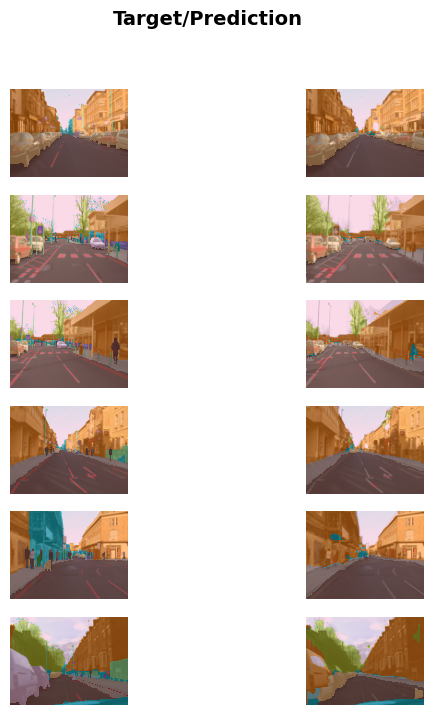

In [9]:
learn.show_results(max_n=6, figsize=(7,8))

Or we can plat the `k` instances that contributed to the most to the validation loss by using the SegmentationInterpretation class.

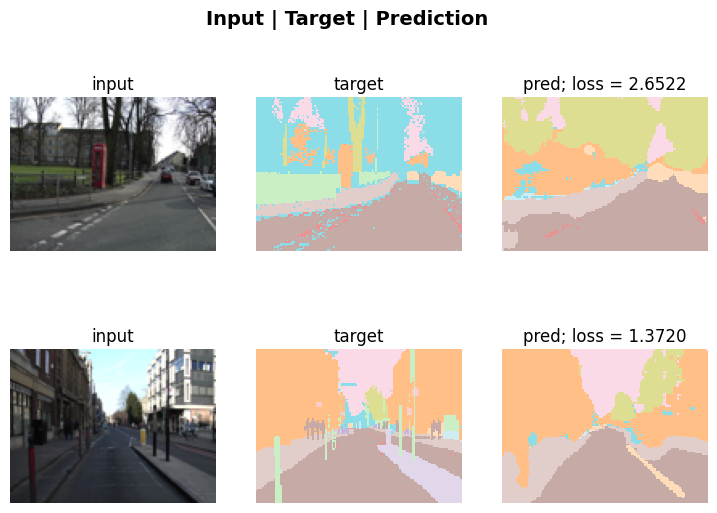

In [10]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=2)

## Natural Language Processing

In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.459588,0.395562,0.829560,03:13


epoch,train_loss,valid_loss,accuracy,time
